In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [9]:
land = pd.read_csv('../data/산사태 발생이력.csv', encoding = 'cp949')

In [62]:
land['sgg'] = land['sgg'].apply(lambda X: X+' ')
land['region'] = land['sgg']+land['umd']

In [64]:
region_sum = land.groupby('region').sum()

(array([206.,  16.,   8.,   5.,   2.,   2.,   1.,   1.,   1.,   1.]),
 array([ 1. ,  7.8, 14.6, 21.4, 28.2, 35. , 41.8, 48.6, 55.4, 62.2, 69. ]),
 <a list of 10 Patch objects>)

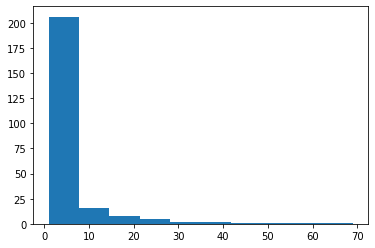

In [68]:
#2011.07~2019.10 기간 동안 각 지역에서 발생한 산사태 총 건수 히스토그램
plt.hist(region_sum['sum_cnt'])

In [78]:
print('산사태가 가장 많이 발생한 지역 : 창수면 69번')
print('산사태 피해면적이 가장 넓은 지역 : 함양군 안의면 61.26')
print('산사태 피해면적이 가장 좁은 지역 : 영천시 완산동 0.02')

print('산사태 발생 건수가 10 이상인 지역 : ', len(region_sum[region_sum['sum_cnt']>10]),'곳')
print('산사태 발생 건수가 10 이하인 지역 : ', len(region_sum[region_sum['sum_cnt']<=10]),'곳')

산사태가 가장 많이 발생한 지역 : 창수면 69번
산사태 피해면적이 가장 넓은 지역 : 함양군 안의면 61.26
산사태 피해면적이 가장 좁은 지역 : 영천시 완산동 0.02
산사태 발생 건수가 10 이상인 지역 :  26 곳
산사태 발생 건수가 10 이하인 지역 :  217 곳


In [2]:
SHP_south = gpd.read_file('../data/토지도/토양도_48_경상남도/TB_FGDI_FS_IJ5000_PG_48.shp')
SHP_north_1 = gpd.read_file('../data/토지도/토양도_47_경상북도/TB_FGDI_FS_IJ5000_PG_47_1.shp')
SHP_north_2 = gpd.read_file('../data/토지도/토양도_47_경상북도/TB_FGDI_FS_IJ5000_PG_47_2.shp')

In [112]:
boundary = gpd.read_file('../data/행정동 경계/umd.shp',encoding='utf-8')

In [8]:
SHP = pd.concat([SHP_south,SHP_north_1],axis=0)
SHP = pd.concat([SHP,SHP_north_2],axis=0)

No handles with labels found to put in legend.


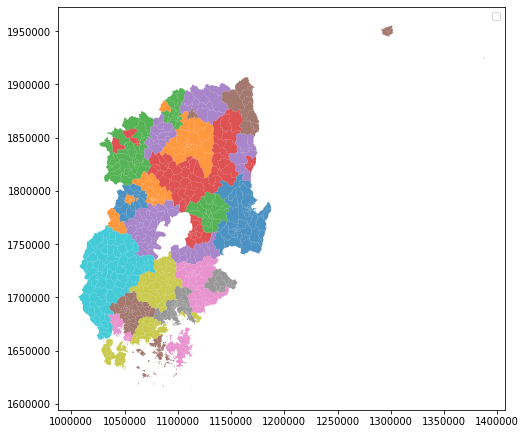

In [115]:
ax = boundary.plot(column="ADM_DR_CD", figsize=(8,8), alpha=0.8)
plt.legend()
plt.show()

No handles with labels found to put in legend.


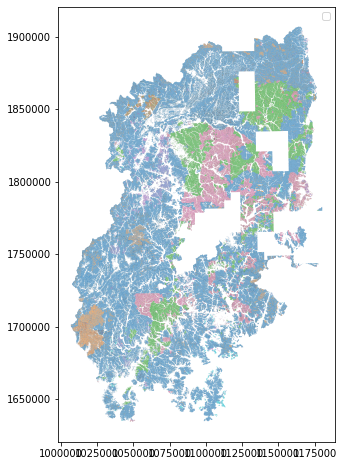

In [9]:
SHP.plot(column="MAP_LABEL", figsize=(8,8), alpha=0.8)
plt.legend()
plt.show()

In [11]:
SHP.iloc[0]

OBJ_ID                                                        1
ARA_XCRD                                              272532.09
ARA_YCRD                                              224400.12
PRRCK_LARG                                                    3
PRRCK_MDDL                                                   31
LOCTN_ALTT                                                138.8
LOCTN_GRDN                                                 27.1
EIGHT_AGL                                                  26.6
CLZN_CD                                                       2
TPGRP_TPCD                                                   12
PRDN_FOM_C                                                   05
SLANT_TYP                                                     2
SLDPT_TPCD                                                   20
SCSTX_CD                                                     01
SLTP_CD                                                      02
LDMARK_STN                              

No handles with labels found to put in legend.


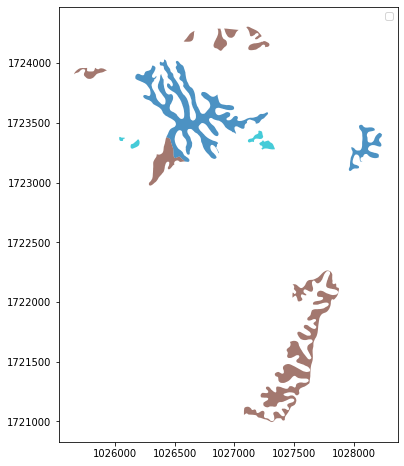

In [25]:
SHP.iloc[0:14].plot(column="MAP_LABEL", figsize=(8,8), alpha=0.8)
plt.legend()
plt.show()